In [187]:
import pandas as pd
import numpy as np
%matplotlib inline

In [188]:
#Importiamo i dati
datami = pd.read_csv("data/incidenti.csv", sep=";")

In [268]:
#Visualizziamo alcune info utili
datami.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1403
Data columns (total 6 columns):
Anno               1404 non-null int64
Mese               1404 non-null int64
NaturaIncidente    1404 non-null object
Incidenti          1404 non-null int64
Feriti             1404 non-null int64
Morti              1404 non-null int64
dtypes: int64(5), object(1)
memory usage: 76.8+ KB


In [269]:
#Visualizziamo alcune info utili
datami.describe()

,Anno,Mese,Incidenti,Feriti,Morti
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,2007.000000,6.500000,129.482194,174.190171,0.609687
std,3.742991,3.453283,117.957941,177.141507,1.015948
min,2001.000000,1.000000,1.000000,1.000000,0.000000
25%,2004.000000,3.750000,53.000000,64.000000,0.000000
50%,2007.000000,6.500000,110.000000,134.500000,0.000000
75%,2010.000000,9.250000,156.000000,201.000000,1.000000
max,2013.000000,12.000000,701.000000,1044.000000,7.000000


In [191]:
#Visualizziamo le prime 5 rows
datami.head()

,Anno,Mese,NaturaIncidente,Incidenti,Feriti,Morti
0,2001,1,Scontro frontale,32,49,1
1,2001,1,Scontro frontale-laterale,482,758,1
2,2001,1,Scontro laterale,66,75,1
3,2001,1,Tamponamento,151,227,0
4,2001,1,Investimento pedone,204,232,4


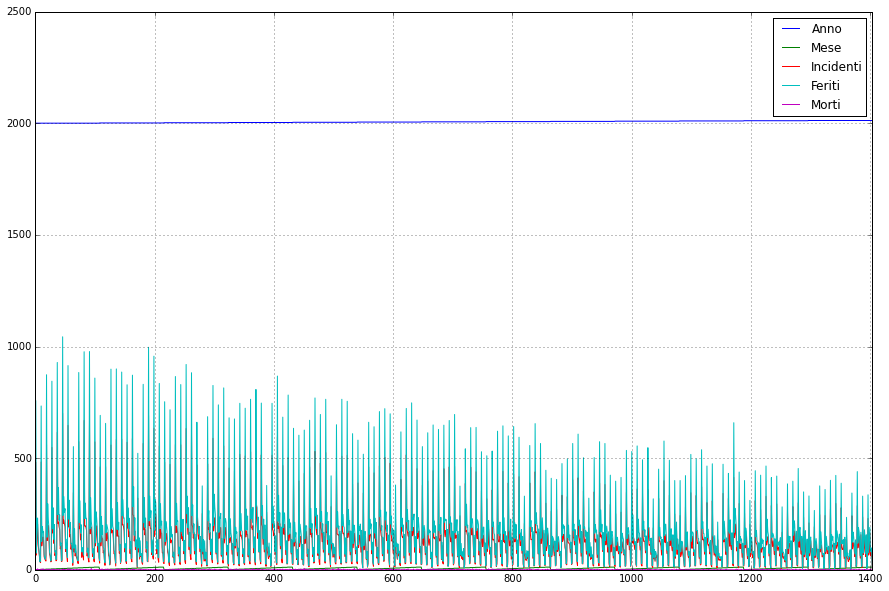

In [192]:
#Tempo di grafici
datami.plot(figsize=(15, 10))

In [193]:
#Rows con Anno == 2005
datami[datami['Anno'] == 2005].head()

,Anno,Mese,NaturaIncidente,Incidenti,Feriti,Morti
432,2005,1,Scontro frontale,24,29,1
433,2005,1,Scontro frontale-laterale,399,634,1
434,2005,1,Scontro laterale,106,124,0
435,2005,1,Tamponamento,141,213,1
436,2005,1,Investimento pedone,125,147,3


In [195]:
#Raggruppiamo per natura incidente
data_summed = datami.groupby("NaturaIncidente").sum()
data_summed = data_summed.drop(["Anno","Mese"],1)
#Calcoliamo qualche coefficiente
data_summed['M/I (x 1000)'] = data_summed["Morti"] / data_summed["Incidenti"] * 1000
data_summed['F/I (x 100)'] = data_summed["Feriti"] / data_summed["Incidenti"] * 100
data_summed['Frequenza relativa'] = data_summed["Incidenti"] / data_summed["Incidenti"].sum() * 100
data_summed

,Incidenti,Feriti,Morti,M/I (x 1000),F/I (x 100),Frequenza relativa
NaturaIncidente,,,,,,
Altre cause,4170,4622,7,1.678657,110.839329,2.293818
"Fuoriuscita, sbandamento",17933,19367,53,2.955445,107.996431,9.864516
Investimento pedone,21783,25898,294,13.496764,118.890878,11.982310
Scontro frontale,3370,5142,36,10.682493,152.581602,1.853757
Scontro frontale-laterale,62842,93477,207,3.293975,148.749244,34.567888
Scontro laterale,20219,23988,52,2.571838,118.640882,11.121990
Tamponamento,21201,32929,24,1.132022,155.318145,11.662165
Urto con ostacolo,10279,12370,134,13.036288,120.342446,5.654233
Urto con veicolo in fermata o sosta,19996,26770,49,2.450490,133.876775,10.999323


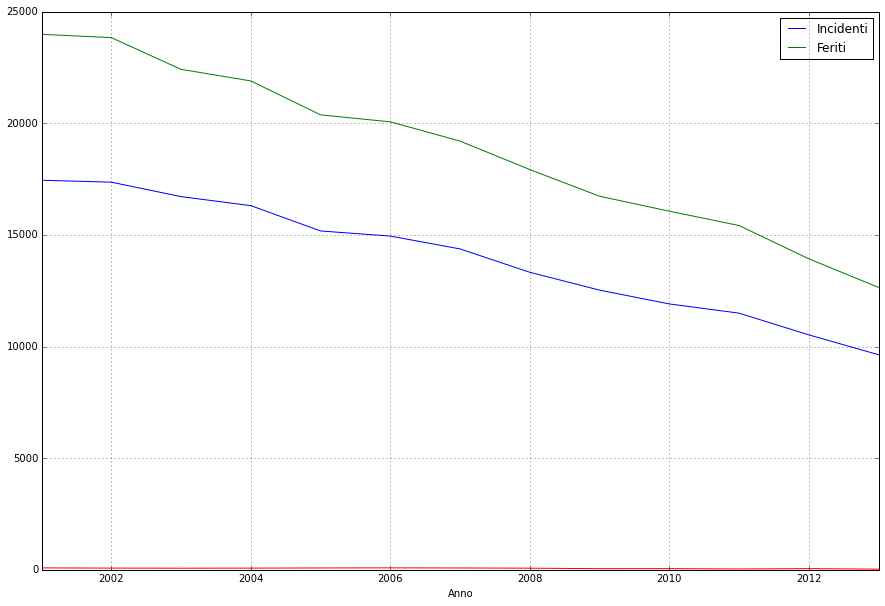

In [196]:
#Andamento annuale
andamento = datami.groupby("Anno").sum()
andamento = andamento.drop("Mese", 1)
andamento[["Incidenti","Feriti"]].plot(figsize=(15, 10))
andamento["Morti"].plot(figsize=(15, 10))

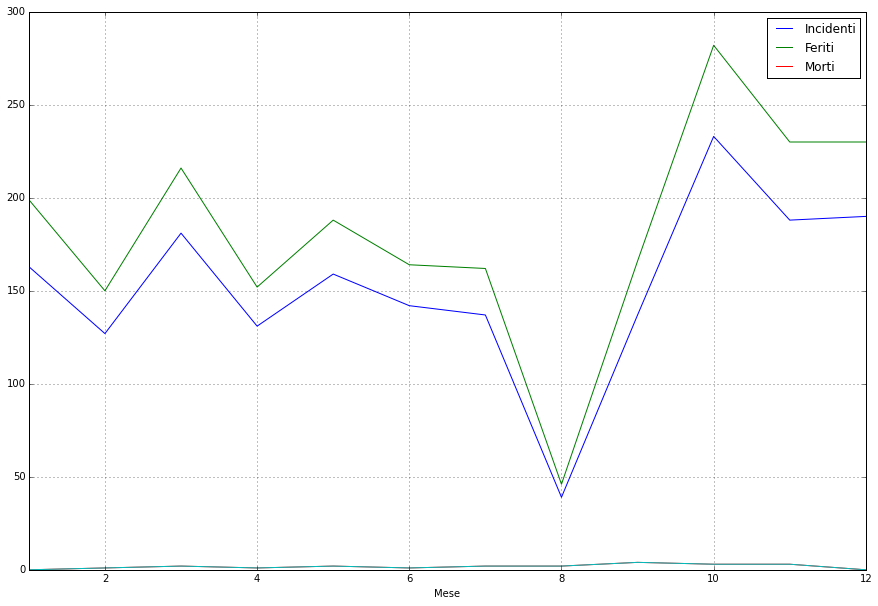

In [272]:
morti_inv_2003 = datami[(datami['Anno'] == 2003) & (datami['NaturaIncidente'] == "Investimento pedone")]
morti_inv_2003 = morti_inv_2003.set_index("Mese")
morti_inv_2003 = morti_inv_2003.drop("Anno", 1)
morti_inv_2003.plot(figsize=(15, 10))
morti_inv_2003["Morti"].plot(figsize=(15, 10))

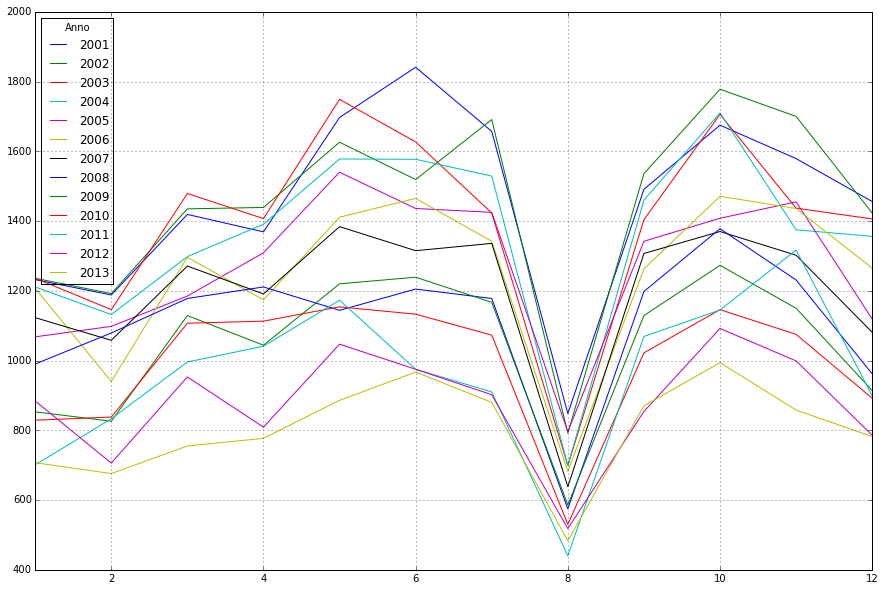

In [279]:
#Andamento mensile negli anni
columns = datami.groupby(["Anno","Mese"]).sum()
c_mensile = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12], 
                         columns=columns.index.levels[0])
for i in columns.index.levels[0]:
 c_mensile[i] = columns.loc[i]["Incidenti"]
c_mensile.plot(figsize=(15, 10))

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Altre cause,596,494,512,397,389,348,259,204,296,213,216,159,87
"Fuoriuscita, sbandamento",1022,1159,1371,1541,1456,1515,1527,1509,1466,1367,1267,1388,1345
Investimento pedone,1989,1906,1827,1747,1704,1684,1770,1623,1521,1547,1533,1522,1410
Scontro frontale,424,359,312,286,293,270,279,230,205,187,192,170,163
Scontro frontale-laterale,6855,6577,6165,5840,5352,5169,4898,4473,3963,3764,3692,3202,2892
Scontro laterale,1804,1933,1838,1893,1724,1755,1702,1496,1383,1289,1365,1112,925
Tamponamento,2137,2194,1983,1938,1801,1731,1584,1456,1410,1363,1262,1232,1110
Urto con ostacolo,860,886,818,845,726,797,691,750,826,942,779,657,702
Urto con veicolo in fermata o sosta,1765,1859,1893,1829,1736,1683,1666,1588,1460,1240,1193,1083,1001


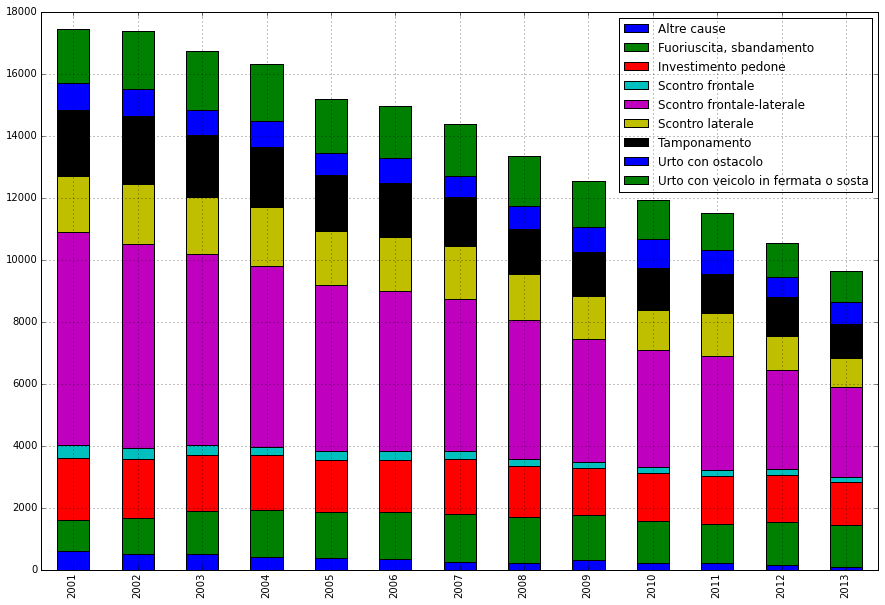

In [267]:
df = datami.groupby(["Anno","NaturaIncidente"]).sum()
df = df.drop(["Mese"],1)
df = df.reset_index()
andamento = pd.DataFrame(
    {anno: df[df["Anno"] == anno]["Incidenti"].values
     for anno in df["Anno"].unique()},
    index=df["NaturaIncidente"].unique())
andamento.T.plot(kind='bar', stacked=True, figsize=(15, 10))
andamento

In [280]:
#Dati sul clima
clima = pd.read_csv("data/meteo_milano.csv", sep=",", 
                    index_col="Periodo", parse_dates=True)
clima_data = clima.resample("M", how="mean")

#Correlation POWAA !
data_2013 = datami[datami["Anno"] == 2013]
data_2013 = data_2013.drop("Anno",1)
clima_2013 = clima_data.loc["2013"]

for i in data_2013["NaturaIncidente"].unique():
    temp = data_2013[data_2013["NaturaIncidente"] == i]
    temp = temp.drop("NaturaIncidente",1)
    temp = temp.set_index(clima_2013.index) ###
    clima_2013["Incidenti " + i] = temp['Incidenti']
    clima_2013["Feriti " + i] = temp['Feriti']
    clima_2013["Morti " + i] = temp['Morti']

corr_2013 = clima_2013.corr()
corr_2013["Pioggia(mm)"][(corr_2013["Pioggia(mm)"] >= 0.25) | (corr_2013["Pioggia(mm)"] <= -0.25)]


Pioggia(mm)                           1.000000
Incidenti Scontro frontale            0.388274
Feriti Scontro frontale               0.451986
Feriti Scontro frontale-laterale      0.312275
Incidenti Tamponamento                0.361103
Feriti Tamponamento                   0.374726
Incidenti Urto con ostacolo           0.613364
Feriti Urto con ostacolo              0.566065
Morti Urto con ostacolo               0.259459
Incidenti Fuoriuscita, sbandamento   -0.258573
Feriti Fuoriuscita, sbandamento      -0.261792
Morti Fuoriuscita, sbandamento       -0.401988
Incidenti Altre cause                -0.322604
Feriti Altre cause                   -0.425022
Name: Pioggia(mm), dtype: float64

In [295]:
name = "Christian Barra"
location = "Often Milan or around the world"
blog = "chrisbarra.me"
github = "github.com/barrrachri"
actually = "I’m studying statistics and looking for something interesting to do !"

print("Do you need some help ?")
print("{}@{}.com".format("barrachri", "gmail"))

Do you need some help ?
barrachri@gmail.com
